In [33]:
"""Created some day.

@authors:  salmon, gramfort, vernade
"""
from functools import partial  # useful for weighted distances
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn import metrics
from scipy import stats  # to use scipy.stats.mode
from sklearn import neighbors
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tpknnsource import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                           rand_checkers, rand_clown, plot_2d, ErrorCurve,
                           frontiere_new, LOOCurve)
from sklearn.metrics import pairwise_distances
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from matplotlib import rc

plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()


{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.25,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [29]:
############################################################################
#     Data Generation: example
############################################################################

# Q1

np.random.seed(42)  # fix seed globally

n = 100
mu = [1., 1.]
sigma = [1., 1.]
rand_gauss(n, mu, sigma)

n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)

n1 = 50
n2 = 50
n3 = 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
sigma3 = [0.9, 0.9]
X2, y2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigma1, sigma2, sigma3)

n1 = 50
n2 = 50
sigma1 = 1.
sigma2 = 5.
X3, y3 = rand_clown(n1, n2, sigma1, sigma2)

n1 = 150
n2 = 150
sigma = 0.1
X4, y4 = rand_checkers(n1, n2, sigma)


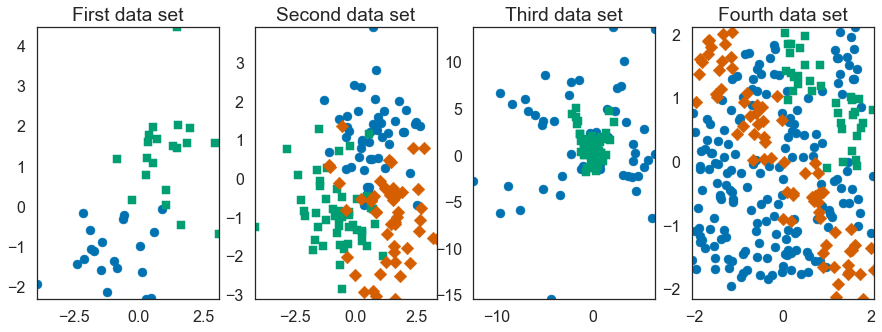

In [30]:
############################################################################
#     Displaying labeled data
############################################################################

plt.show()
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('First data set')
plot_2d(X1, y1)

plt.subplot(142)
plt.title('Second data set')
plot_2d(X2, y2)

plt.subplot(143)
plt.title('Third data set')
plot_2d(X3, y3)

plt.subplot(144)
plt.title('Fourth data set')
plot_2d(X4, y4)


In [43]:
############################################################################
#     K-NN
############################################################################

# Q2 : Write your own implementation


class KNNClassifier(BaseEstimator, ClassifierMixin):
    """Home made KNN Classifier class."""

    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        # TODO: Compute all pairwise distances between X and self.X_ using e.g.
        # metrics.pairwise.pairwise_distances 
        dist =pairwise_distances(X,self.X_)
        # Get indices to sort them
        idx_sort = np.argsort(dist, axis=1)
        # Get indices of neighbors
        idx_neighbors = idx_sort[:,:self.n_neighbors]
        # Get labels of neighbors
        y_neighbors =self.y_[idx_neighbors]
        # Find the predicted labels y for each entry in X
        # You can use the scipy.stats.mode function
        mode, _ = stats.mode(y_neighbors, axis=1)
        # the following might be needed for dimensionaality
        y_pred = np.asarray(mode.ravel(), dtype=np.intp)
        return y_pred

# TODO : compare your implementation with scikit-learn

# Focus on dataset 2 for instance
X_train = X2[::2]
Y_train = y2[::2].astype(int)
X_test = X2[1::2]
Y_test = y2[1::2].astype(int)


cf = KNNClassifier(n_neighbors=7)
cf.fit(X_train,Y_train)
Ypred_Train =cf.predict(X_train)
Ypred_own = cf.predict(X_test)


#Error
print(accuracy_score(Ypred_own,Y_test))
print(Ypred_own)



0.826666666667
[2 3 1 2 2 1 2 1 1 2 1 2 2 2 1 1 2 3 2 3 2 1 2 1 2 3 2 1 3 3 2 1 3 2 2 2 2
 2 2 2 1 1 2 1 2 2 1 2 3 2 1 3 2 2 1 1 1 3 1 3 3 1 1 2 2 2 2 3 3 1 3 2 1 2
 1]


In [41]:
# TODO: use KNeighborsClassifier vs. KNNClassifier
cf_knn = KNeighborsClassifier(n_neighbors=7)
cf_knn.fit(X_train,Y_train)
Ypred = cf_knn.predict(X_test)
Ypred_KnnTrain=cf_knn.predict(X_train)
print(accuracy_score(Ypred,Y_test))
print(accuracy_score(Ypred_KnnTrain,Y_train))

print(Ypred-Ypred_own)



0.826666666667
0.813333333333
[ 0  0  0  1  1  0  1  0  0  1 -1 -1  1  1 -1 -1  0  1  1  1  0  0 -1  0  0
  0 -1 -2  1  2  0  0  0  0  1  1  1  1  0  1 -1 -2 -1  0  0  0  0  0  1 -1
  0  1 -1  0 -1  0 -2  2 -2  0  0 -1  0  1  0 -1  0  1  2 -1  0  0  0  0 -2]


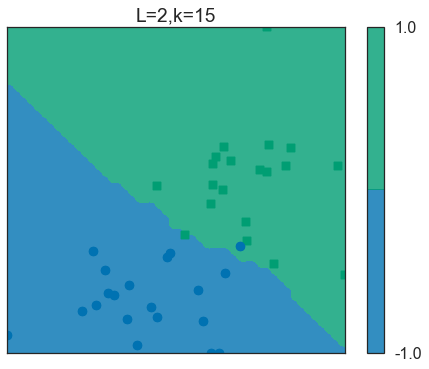

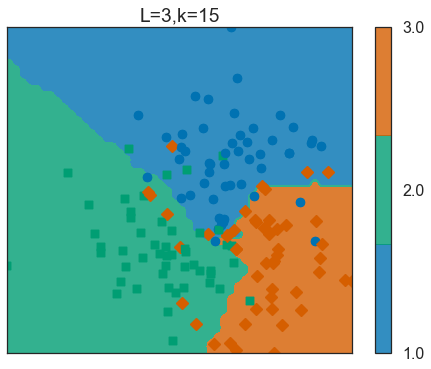

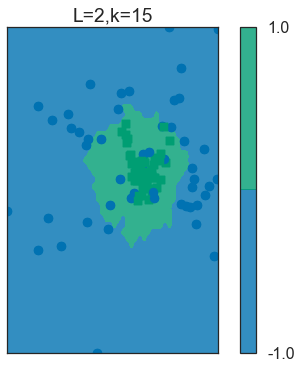

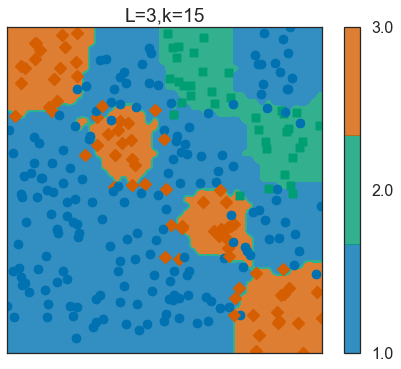

In [47]:
# Q3 : test now all datasets
# From now on use the Scikit-Learn implementation

n_neighbors = 15  # the k in k-NN
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)

for X, y in [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]:

    def f(xx):
        """Classifier: needed to avoid warning due to shape issues."""
        return knn.predict(xx.reshape(1, -1))
    knn.fit(X, y)
    plt.figure()
    plot_2d(X, y)
    n_labels = np.unique(y).shape[0]
    frontiere_new(f, X, y, w=None, step=50, alpha_choice=1, n_labels=n_labels,
                  n_neighbors=n_neighbors)




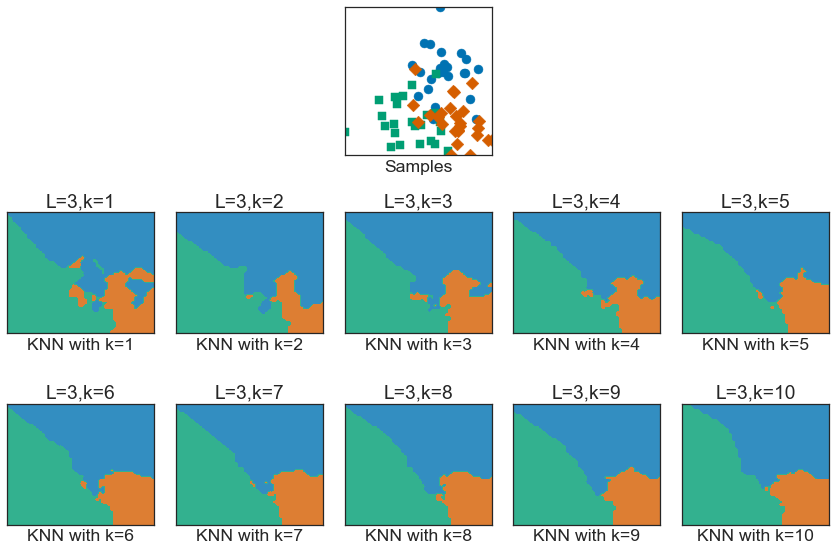

In [49]:
# Q4: Display the result when varying the value of K

plt.figure(3, figsize=(12, 8))
plt.subplot(3, 5, 3)
plot_2d(X_train, Y_train)
plt.xlabel('Samples')
ax = plt.gca()
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

for n_neighbors in range(1, 11):
    # TODO : fit the knn
    knn =KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)
    plt.subplot(3, 5, 5 + n_neighbors)
    plt.xlabel('KNN with k=%d' % n_neighbors)

    def f(xx):
        """Classifier: needed to avoid warning due to shape issues."""
        return knn.predict(xx.reshape(1, -1))

    n_labels = np.unique(y).shape[0]
    frontiere_new(f, X_train, Y_train, w=None, step=50, alpha_choice=1, n_labels=n_labels,
                  colorbar=False, samples=False, n_neighbors=n_neighbors)
    plt.draw()  # update plot

plt.tight_layout()




[2 2 2 3 3 1 1 3 3 1 1 1 1 2 1 2 2 3 2 3 1 3 1 2 1 1 1 1 1 2 3 2 2 2 2 3 3
 2 2 2 3 3 3 3 1 3 3 2 1 3 3 3 2 3 3 3 3 1 1 1 3 1 3 1 1 2 3 3 3 1 1 2 3 1
 2]


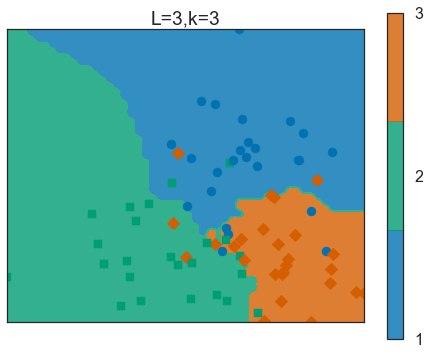

In [52]:
def f(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return knn.predict(xx.reshape(1, -1))


frontiere_new(f, X_train, Y_train, w=None, step=50, alpha_choice=1)

print(knn.predict(X_train))








In [53]:
for n_neighbors in range(1, 11):
    # TODO : fit the knn
    knn =KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)
    print(accuracy_score(knn.predict(X_train),Y_train))
    

1.0
0.84
0.813333333333
0.8
0.8
0.76
0.813333333333
0.786666666667
0.813333333333
0.773333333333


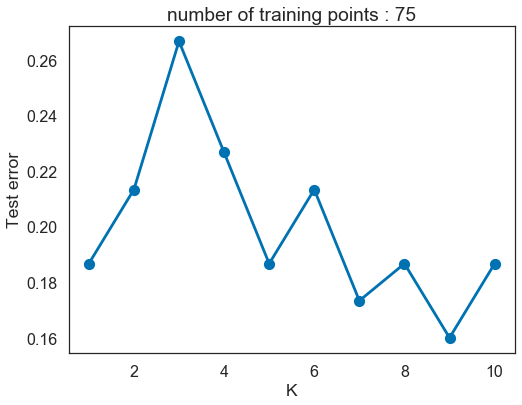

In [56]:
myerror_curve = ErrorCurve(k_range=list(range(1,11)))
myerror_curve.fit_curve(X_train, Y_train, X_test, Y_test)
myerror_curve.plot()